<a href="https://colab.research.google.com/github/Vinnycheese2006/Data-Science/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path="/content/gdrive/My Drive/Colab Notebooks/"
Stats = pd.read_csv(file_path+'Basic_Stats.csv')

Mounted at /content/gdrive


This is used to see the correlation of your birth place and where your current team is. Determined below is the accuracy of these two

In [ ]:
print(Stats)

        Age        Birth Place    Birthday           College Current Status  \
0       NaN  Grand Rapids , MI   5/23/1921        Notre Dame        Retired   
1       NaN        Dayton , OH  12/21/1930            Dayton        Retired   
2      56.0        Temple , TX   9/11/1960    Louisiana Tech        Retired   
3      30.0   New Orleans , LA   9/30/1986               LSU        Retired   
4      25.0       Detroit , MI   3/31/1992  Central Michigan         Active   
...     ...                ...         ...               ...            ...   
17167  73.0       Detroit , MI   2/15/1944    Michigan State        Retired   
17168  32.0       Worland , WY   8/19/1984       Weber State        Retired   
17169  43.0    Washington , DC    5/4/1974             Akron        Retired   
17170   NaN   New Willard , TX   3/30/1921            Baylor        Retired   
17171  54.0         Bryan , TX  10/21/1962            Baylor        Retired   

              Current Team  Experience  Height (inc

In [ ]:
print(Stats.head())

    Age        Birth Place    Birthday           College Current Status  \
0   NaN  Grand Rapids , MI   5/23/1921        Notre Dame        Retired   
1   NaN        Dayton , OH  12/21/1930            Dayton        Retired   
2  56.0        Temple , TX   9/11/1960    Louisiana Tech        Retired   
3  30.0   New Orleans , LA   9/30/1986               LSU        Retired   
4  25.0       Detroit , MI   3/31/1992  Central Michigan         Active   

          Current Team  Experience  Height (inches)     High School  \
0                  NaN   3 Seasons             71.0             NaN   
1                  NaN    1 Season             70.0             NaN   
2                  NaN    1 Season             74.0             NaN   
3                  NaN   5 Seasons             73.0             NaN   
4  Pittsburgh Steelers  3rd season             77.0  Clintondale HS   

          High School Location            Name  Number            Player Id  \
0                          NaN     Evans, F

In [ ]:
categorical_columns = Stats.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {Stats[col].unique()}")

Unique values in Birth Place: ['Grand Rapids , MI' 'Dayton , OH' 'Temple , TX' ... 'Ravenswood , WV'
 'Worland , WY' 'New Willard , TX']
Unique values in Birthday: ['5/23/1921' '12/21/1930' '9/11/1960' ... '5/4/1974' '3/30/1921'
 '10/21/1962']
Unique values in College: ['Notre Dame' 'Dayton' 'Louisiana Tech' 'LSU' 'Central Michigan'
 'Illinois' 'Wisconsin' 'Clemson' 'No College' 'Duquesne' 'Tennessee Tech'
 'Southern University' 'Boise State' 'Arkansas' 'Missouri' 'Florida A&M'
 'Arizona' 'Pittsburgh' 'Louisiana-Lafayette' 'Syracuse' 'Yale' 'Nevada'
 'California' 'Texas Tech' 'American International' 'Arkansas State'
 'Georgia Tech' 'Florida' 'Michigan State' 'Hofstra' 'U. of Pacific'
 'Ohio State' 'Colorado State' 'Ohio U.' 'South Florida' 'Illinois State'
 'Georgia' 'Columbia' 'Oklahoma' 'Buffalo' 'Akron' 'Iowa' 'Nebraska'
 'Mississippi State' 'Maryland' 'Pittsburg State' 'Creighton'
 'Massachusetts' 'Compton CC CA' 'Texas Christian' "St. Mary's (CA)"
 'Texas A&M' 'Montana' 'Utah' 'I

In [ ]:

for col in Stats.select_dtypes(include=['object']).columns:
    try:
        Stats[col] = pd.to_numeric(Stats[col], errors='raise')  # errors='raise' will raise an error if conversion fails
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric and will be skipped.")

descriptive_stats = Stats.describe()


numeric_stats = Stats.select_dtypes(include=['number'])  # Select only numeric columns
range_stats = numeric_stats.max() - numeric_stats.min()

print(descriptive_stats)
print("Range of each column:\n", range_stats)

Column 'Birth Place' could not be converted to numeric and will be skipped.
Column 'Birthday' could not be converted to numeric and will be skipped.
Column 'College' could not be converted to numeric and will be skipped.
Column 'Current Status' could not be converted to numeric and will be skipped.
Column 'Current Team' could not be converted to numeric and will be skipped.
Column 'Experience' could not be converted to numeric and will be skipped.
Column 'High School' could not be converted to numeric and will be skipped.
Column 'High School Location' could not be converted to numeric and will be skipped.
Column 'Name' could not be converted to numeric and will be skipped.
Column 'Player Id' could not be converted to numeric and will be skipped.
Column 'Position' could not be converted to numeric and will be skipped.
Column 'Years Played' could not be converted to numeric and will be skipped.
                Age  Height (inches)       Number  Weight (lbs)
count  13504.000000     17026.

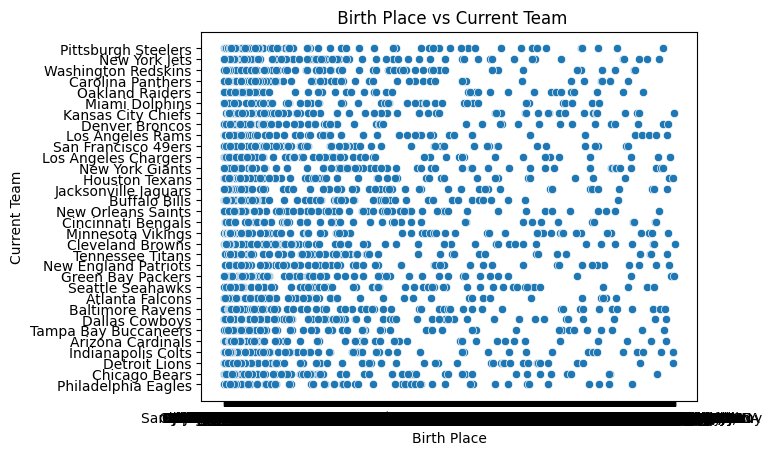

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=Stats, x='Birth Place', y='Current Team')
plt.title(" Birth Place vs Current Team")
plt,xlabel("Birth Place")
plt.ylabel("Current Team")
plt.show()

In [ ]:
!pip install scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



In [ ]:
for col in ['Birth Place', 'Current Team']:
    try:
        Stats[col] = pd.to_numeric(Stats[col], errors='raise')
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric directly. Applying Label Encoding.")
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        Stats[col] = le.fit_transform(Stats[col])
        print(f"Column '{col}' has been label encoded.")

Column 'Birth Place' could not be converted to numeric directly. Applying Label Encoding.
Column 'Birth Place' has been label encoded.
Column 'Current Team' could not be converted to numeric directly. Applying Label Encoding.
Column 'Current Team' has been label encoded.


In [ ]:
pearson_corr, _ = pearsonr(Stats['Birth Place'], Stats['Current Team'])
print(f"Pearson correlation between Current Team and Birth Place: {pearson_corr}")

# Spearman correlation
spearman_corr, _ = spearmanr(Stats['Birth Place'], Stats['Current Team'])
print(f"Spearman correlation between Current Team and Birth Place: {spearman_corr}")

Pearson correlation between Current Team and Birth Place: -0.04056120097916602
Spearman correlation between Current Team and Birth Place: -0.04720000513031965


In [ ]:
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency

In [ ]:
statistic, p_value = ks_2samp(Stats['Birth Place'], Stats['Current Team'])
print(f"KS Test statistic: {statistic}, p-value: {p_value}")

KS Test statistic: 0.996680642907058, p-value: 0.0


In [ ]:
contingency_table = pd.crosstab(Stats['Birth Place'], Stats['Current Team'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared test statistic: {chi2_stat}, p-value: {p_value}")

Chi-Squared test statistic: 129427.63938607302, p-value: 1.0


In [ ]:
X = Stats[['Birth Place']]  # Example predictor columns
y = Stats['Current Team']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Stats['Current Team'])
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Mean Squared Error: 57.055491229455214
R-squared: 0.0015969681588491325
Accuracy: 0.8151382823871907


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Research Question 1: Where is the majority of NFL Players born


In [ ]:
print(Stats['Birth Place'])

0        1593
1         988
2        3957
3        2835
4        1046
         ... 
17167    1046
17168    4432
17169    4205
17170    2846
17171     506
Name: Birth Place, Length: 17172, dtype: int64


In [ ]:
Birth_Place_counts = Stats['Birth Place'].value_counts()

# Display the top birth places
print(Birth_Place_counts)

Birth Place
4487    2378
2326     304
711      273
1853     220
2574     176
        ... 
3235       1
655        1
455        1
1144       1
2846       1
Name: count, Length: 4488, dtype: int64


In [ ]:
most_common_Birth_Place = Birth_Place_counts.idxmax()
most_common_count = Birth_Place_counts.max()

print(f"The most common birth place is {most_common_Birth_Place} with {most_common_count} players.")

The most common birth place is 4487 with 2378 players.


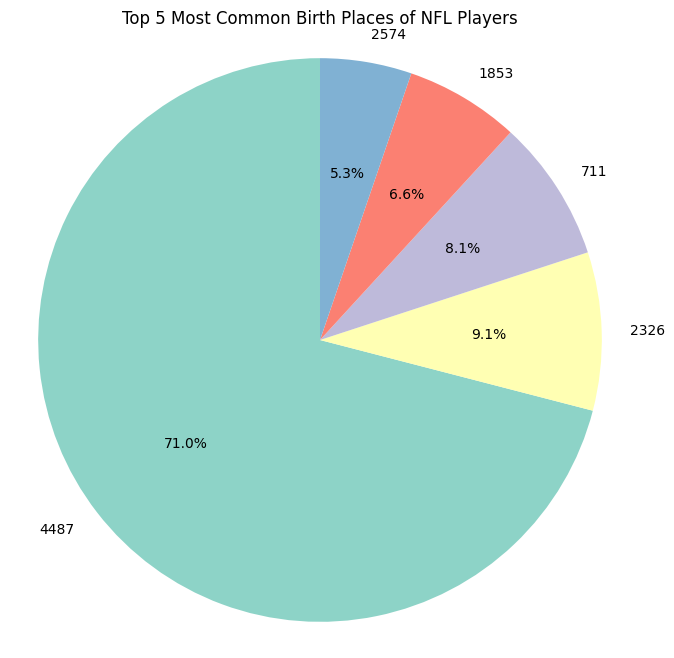

In [ ]:
top_5_birth_places = Stats['Birth Place'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_birth_places, labels=top_5_birth_places.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(top_5_birth_places)))
plt.title('Top 5 Most Common Birth Places of NFL Players')
plt.axis('equal')
plt.show()

Research Question 2: What is the Average weight and height of NFL Players

In [ ]:
average_height = Stats['Height (inches)'].mean()
average_weight = Stats['Weight (lbs)'].mean()

print(f"Average Height: {average_height:.2f} inches")
print(f"Average Weight: {average_weight:.2f} pounds")

Average Height: 73.51 inches
Average Weight: 229.22 pounds


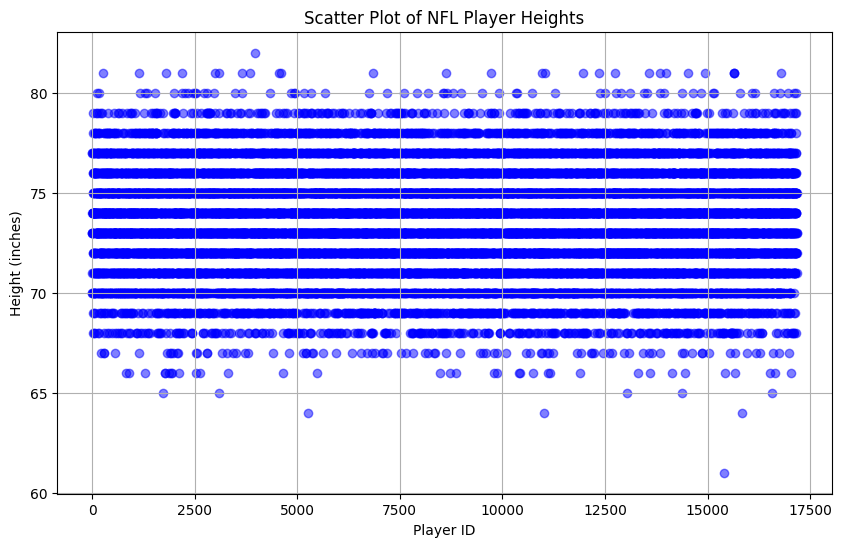

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Stats.index, Stats['Height (inches)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of NFL Player Heights')
plt.xlabel('Player ID')
plt.ylabel('Height (inches)')
plt.grid(True)
plt.show()

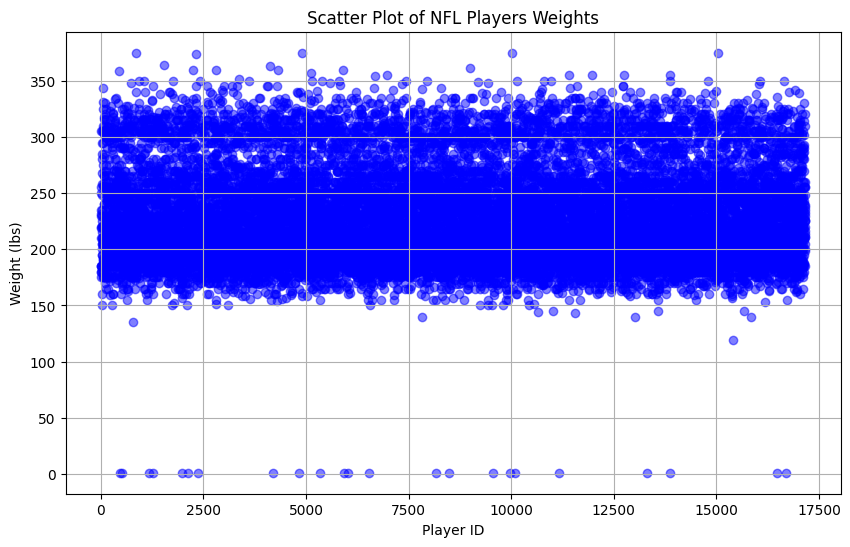

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Stats.index, Stats['Weight (lbs)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of NFL Players Weights')
plt.xlabel('Player ID')
plt.ylabel('Weight (lbs)')
plt.grid(True)
plt.show()

Average Height: 73.51 inches
Average Weight: 229.22 lbs
Percentage of Average Weight compared to Average Height: 311.83%


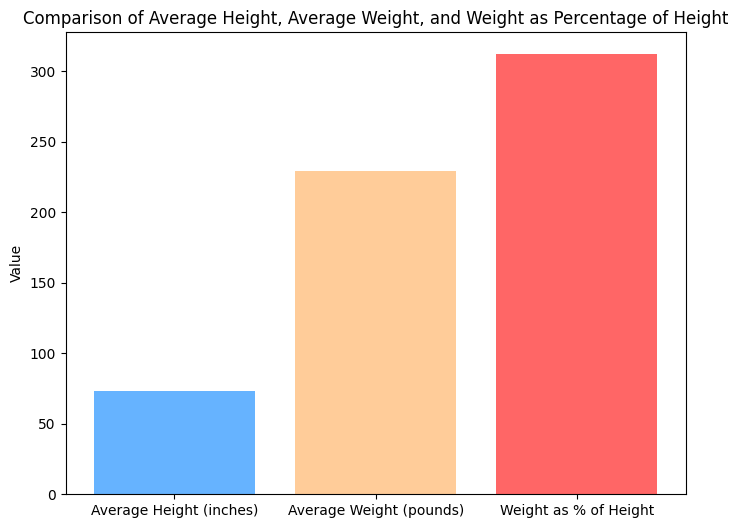

In [ ]:
percentage_weight_vs_height = (average_weight / average_height) * 100

# Display the result
print(f"Average Height: {average_height:.2f} inches")
print(f"Average Weight: {average_weight:.2f} lbs")
print(f"Percentage of Average Weight compared to Average Height: {percentage_weight_vs_height:.2f}%")

# Plotting the comparison
labels = ['Average Height (inches)', 'Average Weight (pounds)', 'Weight as % of Height']
values = [average_height, average_weight, percentage_weight_vs_height]

# Create the bar chart to show the comparison
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['#66b3ff', '#ffcc99', '#ff6666'])
plt.title('Comparison of Average Height, Average Weight, and Weight as Percentage of Height')
plt.ylabel('Value')
plt.show()

In [ ]:
top_5_common_values = Stats['Birth Place'].value_counts().head(5)

# Print the result
print("Top 5 most common values in the column are:")
print(top_5_common_values)

Top 5 most common values in the column are:
Birth Place
Los Angeles , CA    304
Chicago , IL        273
Houston , TX        220
Miami , FL          176
Dallas , TX         163
Name: count, dtype: int64
